<a href="https://colab.research.google.com/github/arpitamangal/machineLearningInPython/blob/master/Kmeans%26PCA/KMeans%26PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #if running on colab, uncomment this cell and upload file 
# from google.colab import files
# files.upload()
# #(click on choose files and select files to upload)

In [ ]:
#print all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import random


In [ ]:
#reading data from csv
df = pd.read_csv("madelon.csv")
df.shape
df.head()

(2600, 501)

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,0,485,477,537,479,452,471,491,476,475,...,477,481,477,485,511,485,481,479,475,496
1,1,483,458,460,487,587,475,526,479,485,...,463,478,487,338,513,486,483,492,510,517
2,2,487,542,499,468,448,471,442,478,480,...,487,481,492,650,506,501,480,489,499,498
3,3,480,491,510,485,495,472,417,474,502,...,491,480,474,572,454,469,475,482,494,461
4,4,484,502,528,489,466,481,402,478,487,...,488,479,452,435,486,508,481,504,495,511


## Data Preprocessing

In [ ]:
#For getting Columns with count, with having at least 1 null value.
df[df.columns[df.isnull().any()]].isnull().sum()

Series([], dtype: float64)

In [ ]:
#For getting percentage of the null count.
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

Series([], dtype: float64)

In [ ]:
del df['Unnamed: 0']

In [ ]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
count,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,...,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000,2600.000000
mean,481.742308,483.551154,509.338846,483.364615,500.925769,479.351923,480.488462,476.569615,487.016154,478.806538,...,482.255000,478.803462,486.250769,497.734615,493.812308,510.731538,478.151154,483.157308,508.436538,490.588077
std,6.312905,30.338955,38.798710,8.943204,41.356829,6.896949,40.428218,1.391642,15.277242,7.308349,...,20.857658,4.034889,23.682591,127.455585,34.883461,37.701112,5.863052,13.607801,37.030636,25.926791
min,462.000000,377.000000,370.000000,453.000000,360.000000,459.000000,334.000000,471.000000,430.000000,455.000000,...,407.000000,463.000000,391.000000,103.000000,368.000000,353.000000,457.000000,435.000000,363.000000,403.000000
25%,478.000000,464.000000,484.000000,477.000000,474.000000,475.000000,453.000000,476.000000,477.000000,474.000000,...,468.000000,476.000000,471.000000,405.750000,470.000000,486.000000,474.000000,474.000000,483.000000,473.000000
50%,482.000000,484.000000,509.000000,483.000000,500.000000,479.000000,481.000000,477.000000,487.000000,479.000000,...,482.000000,479.000000,486.000000,505.500000,493.000000,510.000000,478.000000,483.000000,508.000000,491.000000
75%,486.000000,504.000000,535.000000,489.000000,527.000000,484.000000,507.000000,477.000000,497.000000,484.000000,...,496.000000,481.000000,502.000000,586.250000,517.000000,536.000000,482.000000,492.000000,533.000000,508.000000
max,503.000000,610.000000,654.000000,519.000000,688.000000,505.000000,611.000000,482.000000,547.000000,505.000000,...,549.000000,497.000000,571.000000,920.000000,615.000000,661.000000,500.000000,535.000000,644.000000,593.000000


In [ ]:
#Function to detect outliers
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return len(outliers), 100*len(outliers)/len(df)

In [ ]:
for column in df:
    print("Number and Percentage of otliers in:",column, find_outliers_IQR(df[column]))

Number and Percentage of otliers in: V1 (22, 0.8461538461538461)
Number and Percentage of otliers in: V2 (20, 0.7692307692307693)
Number and Percentage of otliers in: V3 (32, 1.2307692307692308)
Number and Percentage of otliers in: V4 (16, 0.6153846153846154)
Number and Percentage of otliers in: V5 (28, 1.0769230769230769)
Number and Percentage of otliers in: V6 (28, 1.0769230769230769)
Number and Percentage of otliers in: V7 (18, 0.6923076923076923)
Number and Percentage of otliers in: V8 (360, 13.846153846153847)
Number and Percentage of otliers in: V9 (28, 1.0769230769230769)
Number and Percentage of otliers in: V10 (24, 0.9230769230769231)
Number and Percentage of otliers in: V11 (19, 0.7307692307692307)
Number and Percentage of otliers in: V12 (29, 1.1153846153846154)
Number and Percentage of otliers in: V13 (32, 1.2307692307692308)
Number and Percentage of otliers in: V14 (19, 0.7307692307692307)
Number and Percentage of otliers in: V15 (16, 0.6153846153846154)
Number and Percent

We saw our data does not have any missing values but most of our dataset have outliers. The clustering algorithm is sensitive to the presence of outliers hence we need to handle outliers. Removing outliers may lead to loss of information. We treat outliers using scaling method, Standard Scaling uses mean and standard deviation whereas Robust scaling uses median and interquartile range. Since the outliers can significantly alter the mean, robust scaling seems a better approach.

In [ ]:
#robust scaling
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
robust_scaled_df = pd.DataFrame(robust_scaler.fit_transform(df.values),columns=df.columns)

# K-means Clustering

### Affect of number of clusters on the performance of clustering algorithm

If the number of clusters is too low, dissimilar data points would be grouped together and would lead to underfitting. The algorithm would fail to capture patterns. If the number of clusters are too high, there would be differnt clusters even for similar data points resulting in overfitting and the algorithm would fail to generalise. The would not perform well for unseen/ new data.

#### Elbow Rule : Choose optimal K

In [ ]:
from sklearn.cluster import KMeans
sse = []
k_values = [4, 8, 16, 32, 64]
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(robust_scaled_df)
    sse.append(kmeans.inertia_)
    # Sum of Squared Distance (SSE) between between data points and their assigned centroids
    print("SSE at k=",k,"is:", kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE at k= 4 is: 725592.5906419669


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE at k= 8 is: 720877.4904510011


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE at k= 16 is: 716100.1315714929


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE at k= 32 is: 710432.4253104331


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE at k= 64 is: 700139.0999612398


<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Plot of the number of clusters v/s SSE')

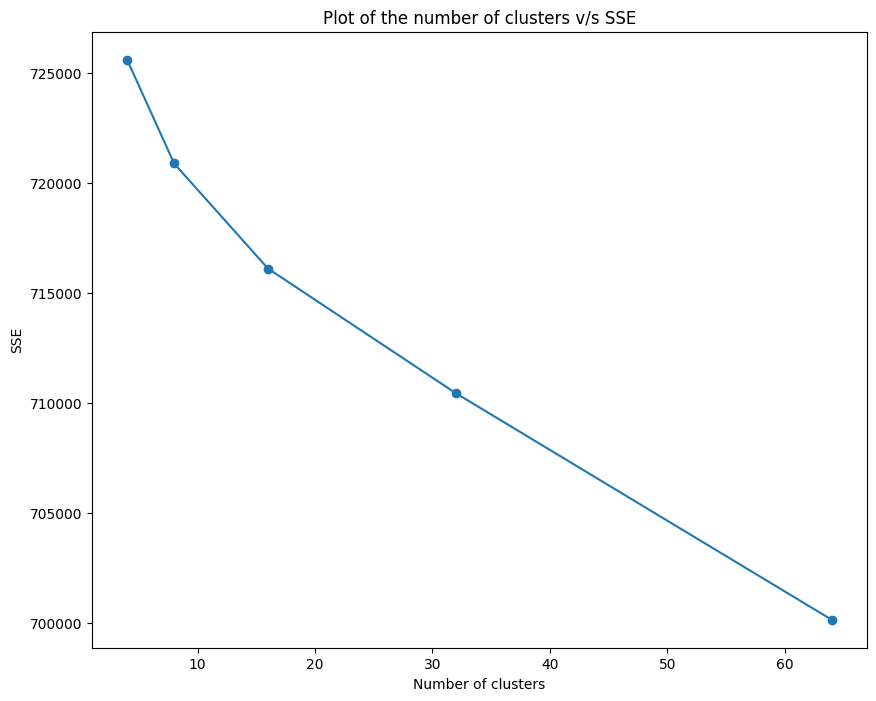

In [ ]:
# Plot SSE for each value of k
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(k_values, sse,marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Plot of the number of clusters v/s SSE')
plt.show()

Since we lack business context here we do not know intutively how many clusters should be there, hence we rely on elbow rule. The elbow plot is plot between the sum of squared errors between data points and their assigned centriods and number of clusters. We chose the optimal K as the elbow point which is where the sharp drop meets the slow drop. From the elbow plot, k=16 seems to be the optimal k, as the rate of decrease of SSE slows down at k=16. 

### Does initializing different set of cluster centroids before running k-means affect the final clusters created?

#### KMeans clustering on the scaled data with initial clusters assigned randomly

In [ ]:
from sklearn.cluster import KMeans
#KMeans clustering on the scaled data with initial clusters assigned randomly
kmeans = KMeans(n_clusters=8, random_state=0, init = "random").fit(robust_scaled_df)

df['cluster'] = kmeans.labels_
print("SSE", kmeans.inertia_)
print("#iterations", kmeans.n_iter_)

# Print the number of samples in each cluster
print(df['cluster'].value_counts())

SSE 720452.8394119258
#iterations 24
7    406
2    379
3    333
5    332
4    326
1    280
6    278
0    266
Name: cluster, dtype: int64


#### KMeans clustering on the scaled data with initial clusters assigned using Kmeans++

In [ ]:
from sklearn.cluster import KMeans
#KMeans clustering on the scaled data with initial clusters assigned using Kmeans++
kmeans = KMeans(n_clusters=8, random_state=0, init = "k-means++").fit(robust_scaled_df)

# Add the cluster labels to your original dataframe
df['cluster'] = kmeans.labels_
print("SSE", kmeans.inertia_)
print("#iterations", kmeans.n_iter_)

# Print the cluster centers and the number of samples in each cluster
print(df['cluster'].value_counts())

SSE 720618.3884428741
#iterations 21
5    483
0    341
1    334
6    316
4    299
2    292
3    278
7    257
Name: cluster, dtype: int64


We initially choose cluster centroids randomly before running K-means. To choose clusters differently, using the k-means++ method. Kmeans++ selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. This does affect the final clusters to some extent as we see from the number of datapoints in each cluster using the two approaches. We observe that while randomly choosing the  clusters the first cluster (labeled as 7) has 406 data points and after choosing the cluster using centriod  differently, the first cluster (labeled  as 5) has  483 data points. We could observe more such re-allocation of data points. As expected  we see that when  we randomly assigned the cluster centriods, it took more number of iterations(24) compared to when we assigned the clusters using Kmeans++ (21 iterations). However, we  don't see much of  a difference in the sum of square errors between the data points and final cluster centriods using any initial cluster centroids. To conclude, the choice of initial clusters does impact the final clusters to some extent, the value of SSE is not impacted much.

# Principal Component Analysis (PCA)

Fit the standardized data with PCA.

In [ ]:
#fit the standardized data with PCA
from sklearn.decomposition import PCA
explained_variance_list = []
explained_variance=0
k = 1
## chosing the numberr of components to retain atleast 75% variance
while(explained_variance < 0.75):
    pca = PCA(n_components = k)
    pca_df = pca.fit_transform(robust_scaled_df)
    explained_variance = sum(pca.explained_variance_ratio_)
    explained_variance_list.append(explained_variance)
    k = k+1

In [ ]:
num_components=k-1
num_components
pca_df.shape

281

(2600, 281)

Text(0.5, 0, 'Number of Components')

Text(0, 0.5, 'Explained Variance')

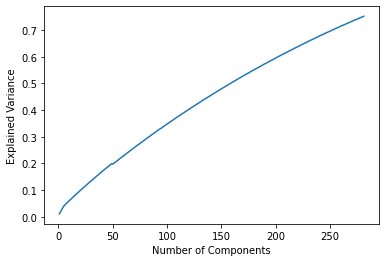

In [ ]:
# Plot SSE for each value of k
import matplotlib.pyplot as plt
plt.plot(range(1, k), explained_variance_list)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Cumulative Variance Plot – Number of components included v/s Amount of variance captured')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.01054065, 0.00779204, 0.00760078, 0.0073106 , 0.0066066 ,
       0.00449219, 0.00422886, 0.00416628, 0.00411865, 0.0040353 ,
       0.00398542, 0.00393341, 0.00392244, 0.00391334, 0.00390256,
       0.00386088, 0.00383595, 0.00381386, 0.00378923, 0.00376282,
       0.00375437, 0.0037485 , 0.00373477, 0.00371513, 0.00369801,
       0.00367328, 0.00366607, 0.00364024, 0.00363594, 0.00360737,
       0.00359161, 0.00357691, 0.00355203, 0.00353987, 0.00352929,
       0.00352576, 0.00351204, 0.00349238, 0.00346846, 0.00345646,
       0.00344953, 0.00343539, 0.00342374, 0.00341574, 0.00340045,
       0.00338807, 0.00337805, 0.0033662 , 0.00336351, 0.00335807,
       0.00333021, 0.00332238, 0.00331355, 0.00329782, 0.00329038,
       0.0032826 , 0.003267  , 0.00325347, 0.00324132, 0.0032325 ,
       0.0032221 , 0.00320713, 0.00319861, 0.00319128, 0.00318663,
       0.00316547, 0.00315847, 0.00314183, 0.00313171, 0.00312273,
       0.00311664, 0.00310167, 0.00309559, 0.00308917, 0.00307

PCA is a lossless algorithm meaning it does not reduced the number of components by itself. It transfers each of the component such that the initial one explain the maximum variance in y values and so on. Each axis is perpendicular to the previous ones. On applying PCA on madelon dataset we observe that the first principal component only expalins 1.05% variance. Generally, we want to retain at least 75% of the variance. In order to retain at least 75% variance, in madelon dataset we need to keep atleast 281 components. 

#### Plot of transformed data with the first two "principal components" as the axes i.e. x = PC 1, y = PC 2.

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Transformed data on first two principal components')

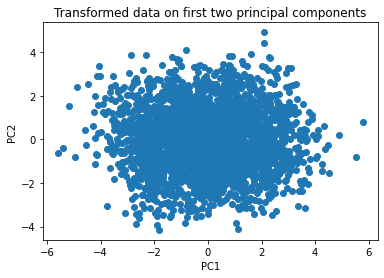

In [ ]:
#Graph of transformed data on first two principal components
import matplotlib.pyplot as plt
plt.scatter(pca_df[:, 0], pca_df[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Transformed data on first two principal components')
plt.show()

In PCA the PC1 axis is the first principal direction along which the samples show the largest variation. The PC2 axis is the second most important direction and it is orthogonal to the PC1 axis. We are likely to observe some clusters as the both axis explains uch of variation. So is the not the case with this particular dataset. As we observed that the first axis only explains about 1.05% variation. It took 281 components to explain 75% variation in dataset. Usually the value is around 10 and we see visible patterns. So is not the case for this datset maybe because the dataset seems to be random.

#### The two "original variables" that have the highest absolute combined loading for PC 1 and PC 2 i.e. maximizing |loading PC1| + |loading PC2|.

In [ ]:
# Get the loading matrix
loading_matrix = pca.components_
loading12 = abs(loading_matrix[0])+abs(loading_matrix[1])

# Getting 2 maximum values
x = np.argsort(loading12)[::-1][:2]
print("Maximum Loading Values:",loading12[x])
print("Indices with maximum loading:",x)


Maximum Loading Values: [0.52823715 0.52572964]
Indices with maximum loading: [472 442]


### Plot of original data with the two "original variables" that have the highest absolute combined loading for PC 1 and PC 2.

Text(0.5, 0, 'V472')

Text(0, 0.5, 'V442')

Text(0.5, 1.0, 'Original data on two original variable with highest loading')

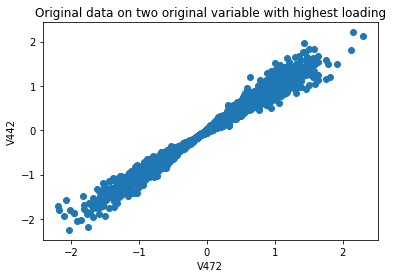

In [ ]:
#Graph of Original data on two original variable with highest loading for PC1 and PC2
import matplotlib.pyplot as plt
plt.scatter(robust_scaled_df.iloc[:, 472], robust_scaled_df.iloc[:, 442])
plt.xlabel('V472')
plt.ylabel('V442')
plt.title('Original data on two original variable with highest loading')
plt.show()

The plot of original data on two original variable with highest loading for PC1 and PC2 will help us observe the relation between the variables and the dataset in the 2D space. We observe a dumbbell shape which could mean that there are atleast two different clusters. The two clusters are majorly located at the farther ends and variation in  the datapoints decreases as they are more close to the centre or the mean value. 

# K-means Custering on the data transformed using PCA
It is difficult to deal with high dimension data and PCA is a method used to reduce dimension by indentifying the components that explain maximum variation in the dataset. K-means clustering is a method to group simialr datapoints together. 
If we have high number of variables, we may end up having larger number of clusters because of the high dimension and overfitting the data. We may fail to identify the actual patterns in dataset and have more clusters than required. First reducing the variates and then applying k-means would help us avoid overfitting and identify actual patterns in the data. This would reduce noise and improve performmance.

#### Elbow plot

In [ ]:
from sklearn.cluster import KMeans
sse = []
k_values = [4, 8, 16, 32, 64]
for k in k_values:
    random.seed(10)
    kmeans = KMeans(n_clusters=k, random_state=0).fit(pca_df)
    sse.append(kmeans.inertia_)
    print("SSE at k=",k,"is:", kmeans.inertia_)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE at k= 4 is: 541872.6513024976


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE at k= 8 is: 536878.5602636421


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE at k= 16 is: 532231.3784127731


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE at k= 32 is: 526895.8853053312


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


SSE at k= 64 is: 517976.2045773554


<Figure size 1000x800 with 0 Axes>

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'SSE')

Text(0.5, 1.0, 'Plot of the number of clusters v/s SSE')

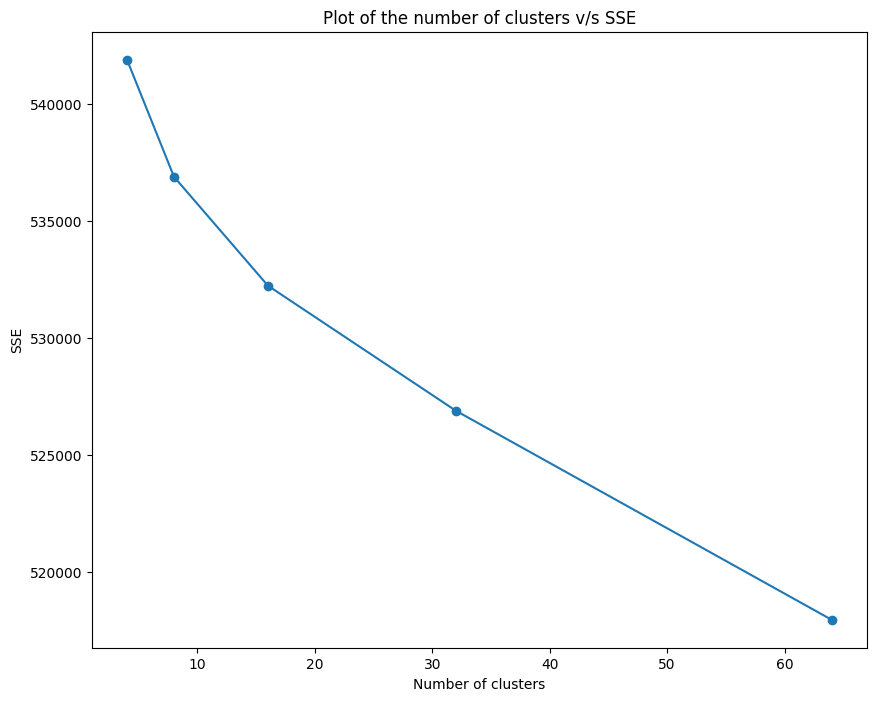

In [ ]:
# Plot SSE for each value of k
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.plot(k_values, sse,marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Plot of the number of clusters v/s SSE')
plt.show()

The rate of decrease in SSE seems tp be slowing down at k=8. Before k=8 it was decreasing sharply. We choose k=8 as the optimal k which is different than the one found (1). This could be because with PCA we kept the dimensions which actually expalin variation in data and are not white noise.

#### Comparison of K-means clustering SSE values before and after performing PCA.
We observed in (1c) SSE at  k=16 is: 716100.16, k=8 is: 720877.5

After applying PCA and them Kmeans we observe thet the SSE at k=16 is: 533406.38, k=8 is: 537908.38

Applying K-mean after PCA we observe a significant decrease in the value of sum of squared errors. This could be because with PCA we kept the dimensions which actually expalin variation in data and are not white noise. This can help to reduce the noise and redundancy in the data, making it easier to identify meaningful clusters using k-means clustering and hence reducing the SSE. The data points in the clusters are more closer to their cluster centers

#### Plot of PC1 v/s PC2 for all of the transformed data points with cluster assignment for the first 5 iterations of k = 32.

SSE AT ITERATION 1 :  534447.7810800426


Text(0.5, 1.0, 'Iteration 1')

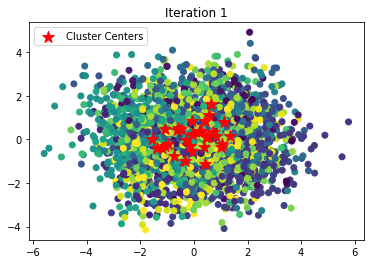

SSE AT ITERATION 2 :  531478.4166531047


Text(0.5, 1.0, 'Iteration 2')

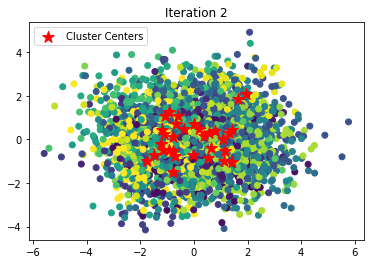

SSE AT ITERATION 3 :  529618.8125619049


Text(0.5, 1.0, 'Iteration 3')

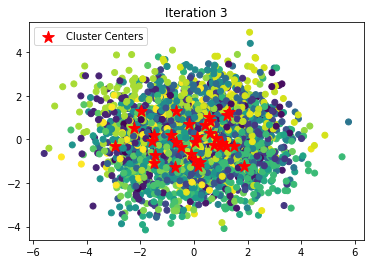

SSE AT ITERATION 4 :  528735.5804400294


Text(0.5, 1.0, 'Iteration 4')

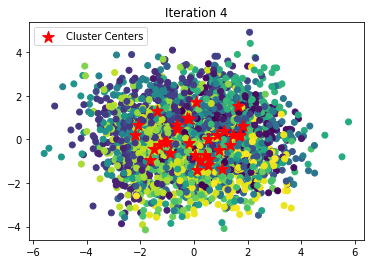

SSE AT ITERATION 5 :  528561.3714852463


Text(0.5, 1.0, 'Iteration 5')

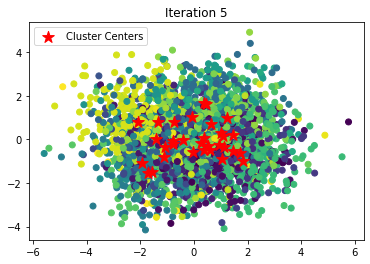

In [ ]:
i=1
while (i<=5):
    random.seed(10)
    kmeans = KMeans(n_clusters=32,max_iter=i,init="k-means++").fit(pca_df)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    print("SSE AT ITERATION",i, ": ", kmeans.inertia_)
    plt.scatter(pca_df[:,0], pca_df[:,1], c=labels)
    plt.scatter(centers[:,0], centers[:,1], marker='*', s=150, color='red', label="Cluster Centers")
    plt.legend()
    plt.title("Iteration {}".format(i))
    plt.show()
    i=i+1

We observe that initially the cluster centres are very close to one another. The distance between the cluster centres has increased on the second iteration. On iterating further we observe that the distance between the cluster centres increases further. We also observe a decrease in the SSE. As the iteration increases there is more variation among the clusters and less variation within the clusters. This implies that the alogorithm is converging towards optimal assignment as the iterations increases. We need to iterate it further till the algorithm reaches a optimal solution and SSE couls not be decreased further.